<a href="https://colab.research.google.com/github/Nikitaion/mental_disorders/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1281]:
!wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/140622_mental_disorders_data.csv -O ds.csv

--2022-06-14 11:31:32--  https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/140622_mental_disorders_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21848 (21K) [text/plain]
Saving to: ‘ds.csv’

ds.csv              100%[===================>]  21.34K  --.-KB/s    in 0s      

2022-06-14 11:31:32 (41.8 MB/s) - ‘ds.csv’ saved [21848/21848]



In [1282]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing import StandardScaler


Tensorflow version: 2.8.2


In [1283]:
ds = pd.read_csv("/content/ds.csv")
ds.head()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,...,Дебют,Частота госпит,Стаж шизофр,P,N,G,(СОН)psqi больше 6,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,УП-1,М,32,4,0,0,5,0,7,1,...,28.3,0,3.7,11,11,18,0,0,0,0
1,УП-2,М,26,2,0,0,5,0,10,1,...,26.0,1,2.0,10,25,36,1,0,1,1
2,УП-3,М,49,2,0,0,5,1,10,0,...,26.0,2,23.0,9,16,23,0,0,0,0
3,УП-4,М,50,2,0,0,5,1,7,1,...,16.0,1,34.0,13,13,20,0,0,0,0
4,УП-5,М,27,2,1,0,5,1,9,1,...,21.0,0,6.0,7,9,22,0,0,0,0


In [1284]:
ds.tail()

,Снинговый номер,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,...,Дебют,Частота госпит,Стаж шизофр,P,N,G,(СОН)psqi больше 6,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
246,УФ-32,М,35,3,0,0,2,0,7,1,...,19.0,0,16.0,19,8,31,0,0,1,1
247,УФ-33,М,57,2,0,0,1,0,9,1,...,22.0,0,35.0,10,10,23,0,0,0,0
248,УФ-34,М,24,4,1,0,5,1,10,1,...,18.0,0,6.0,7,9,27,0,0,0,0
249,УФ-33-2,М,41,2,0,0,3,0,9,1,...,28.0,2,13.0,14,13,21,1,1,1,0
250,УФ-34-2,М,32,2,0,0,5,1,10,1,...,23.0,1,9.0,7,12,28,0,0,1,0


In [1285]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Снинговый номер                            251 non-null    object 
 1   Пол                                        251 non-null    object 
 2   Полных лет                                 251 non-null    int64  
 3   Образование(0-начальное, 4-высшее)         251 non-null    int64  
 4   Род занятий(0-0, работает-1                251 non-null    int64  
 5   Семейное положение(0-0, 1-женат)           251 non-null    int64  
 6   Удовлетворенность семеными отношениями     251 non-null    int64  
 7   Удовлетворенность материальным положением  251 non-null    int64  
 8   Здоровье от 1 до 10                        251 non-null    int64  
 9   Были ли нарушения сна                      251 non-null    int64  
 10  ИМТ                       

In [1286]:
ds.isna().sum()

Снинговый номер                              0
Пол                                          0
Полных лет                                   0
Образование(0-начальное, 4-высшее)           0
Род занятий(0-0, работает-1                  0
Семейное положение(0-0, 1-женат)             0
Удовлетворенность семеными отношениями       0
Удовлетворенность материальным положением    0
Здоровье от 1 до 10                          0
Были ли нарушения сна                        0
ИМТ                                          0
Операции                                     0
Аллергии                                     0
СД                                           0
Забол кожи                                   0
ГБ                                           0
Панкреатит                                   0
Дисфункция ЖКТ                               0
ЧМТ                                          0
Насл отягощенность                           0
Дебют                                        0
Частота госпи

In [1287]:
# drop unnecessary columns
ds = ds.drop(columns=['Снинговый номер'])
# ds = ds.drop(columns=['Здоровье от 1 до 10', 'Удовлетворенность материальным положением', 'Рост', 'Вес', 'BARS (акатизия)', 'SAS (Экстрапир)', 'AIMS (непр дв)', 'ESS', 'шкала общего клин впечатления', 'шкала соц функционир'])

In [1288]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        251 non-null    object 
 1   Полных лет                                 251 non-null    int64  
 2   Образование(0-начальное, 4-высшее)         251 non-null    int64  
 3   Род занятий(0-0, работает-1                251 non-null    int64  
 4   Семейное положение(0-0, 1-женат)           251 non-null    int64  
 5   Удовлетворенность семеными отношениями     251 non-null    int64  
 6   Удовлетворенность материальным положением  251 non-null    int64  
 7   Здоровье от 1 до 10                        251 non-null    int64  
 8   Были ли нарушения сна                      251 non-null    int64  
 9   ИМТ                                        251 non-null    float64
 10  Операции                  

In [1289]:
# Why i did this?
# We have one-hot encoding lol -_-

def change_value_to_numeric(x):
  if type(x) == int or type(x) == float:
    return x

  x = x.strip().lower() # remove spaces and make lower

  if x == "да":
    return 1
  elif x == "нет":
    return 0
  elif x == "м":
    return 1
  elif x == "ж":
    return 0
  
  # Род занятий
  elif x== "не работает":
    return 0
  elif x == "работает":
    return 1
  elif x == "учится":
    return 2
  elif x == "пенсионер":
    return 3
  
  # Семейное положение:
  elif x == "холост":
    return 0 
  elif x == "женат":
    return 1
  elif x == "разведен":
    return 2
  elif x == "вдовец":
    return 3

  # Образование:
  elif x == "среднее":
    return 0 
  elif x == "незаконченное высшее":
    return 1
  elif x == "высшее":
    return 2
  elif x == "неполное среднее":
    return 3
  elif x == "начальное":
    return 4

  # Динамика веса за год:
  elif x == "стабильный вес":
    return 0 
  elif x == "снижение веса":
    return 1
  elif x == "увеличение веса":
    return 2

  # ЧМТ:
  elif x == "нет":
    return 0 
  elif x == "да (без потери сознания)":
    return 1
  elif x == "да (с потерей сознания)":
    return 2

  # Преобл синдром:
  elif x == "аффективно-параноидный":
    return 0 
  elif x == "параноидный":
    return 1
  elif x == "галлюцинаторно-параноидный":
    return 2
  elif x == "парафренный":
    return 3
  elif x == "кататонический":
    return 4

  return "NaN"

In [1290]:
# ds.applymap(lambda x: change_value_to_numeric(x))

In [1291]:
# ds = ds.applymap(lambda x: change_value_to_numeric(x))

In [1292]:
ds['Пол'].value_counts()

М    175
Ж     76
Name: Пол, dtype: int64

In [1293]:
ds['Пол'] = np.where(ds['Пол']=='М',1,0)

In [1294]:
ds['Пол'].value_counts()

1    175
0     76
Name: Пол, dtype: int64

In [1295]:
ds.head()

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,ИМТ,...,Дебют,Частота госпит,Стаж шизофр,P,N,G,(СОН)psqi больше 6,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,1,32,4,0,0,5,0,7,1,24.012346,...,28.3,0,3.7,11,11,18,0,0,0,0
1,1,26,2,0,0,5,0,10,1,20.244898,...,26.0,1,2.0,10,25,36,1,0,1,1
2,1,49,2,0,0,5,1,10,0,29.752744,...,26.0,2,23.0,9,16,23,0,0,0,0
3,1,50,2,0,0,5,1,7,1,22.093170,...,16.0,1,34.0,13,13,20,0,0,0,0
4,1,27,2,1,0,5,1,9,1,26.061679,...,21.0,0,6.0,7,9,22,0,0,0,0


In [1296]:
# Check for na values
ds.isna().sum()

Пол                                          0
Полных лет                                   0
Образование(0-начальное, 4-высшее)           0
Род занятий(0-0, работает-1                  0
Семейное положение(0-0, 1-женат)             0
Удовлетворенность семеными отношениями       0
Удовлетворенность материальным положением    0
Здоровье от 1 до 10                          0
Были ли нарушения сна                        0
ИМТ                                          0
Операции                                     0
Аллергии                                     0
СД                                           0
Забол кожи                                   0
ГБ                                           0
Панкреатит                                   0
Дисфункция ЖКТ                               0
ЧМТ                                          0
Насл отягощенность                           0
Дебют                                        0
Частота госпит                               0
Стаж шизофр  

In [1297]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        251 non-null    int64  
 1   Полных лет                                 251 non-null    int64  
 2   Образование(0-начальное, 4-высшее)         251 non-null    int64  
 3   Род занятий(0-0, работает-1                251 non-null    int64  
 4   Семейное положение(0-0, 1-женат)           251 non-null    int64  
 5   Удовлетворенность семеными отношениями     251 non-null    int64  
 6   Удовлетворенность материальным положением  251 non-null    int64  
 7   Здоровье от 1 до 10                        251 non-null    int64  
 8   Были ли нарушения сна                      251 non-null    int64  
 9   ИМТ                                        251 non-null    float64
 10  Операции                  

In [1298]:
# turn dataset to float32
ds = ds.astype(np.float32)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Пол                                        251 non-null    float32
 1   Полных лет                                 251 non-null    float32
 2   Образование(0-начальное, 4-высшее)         251 non-null    float32
 3   Род занятий(0-0, работает-1                251 non-null    float32
 4   Семейное положение(0-0, 1-женат)           251 non-null    float32
 5   Удовлетворенность семеными отношениями     251 non-null    float32
 6   Удовлетворенность материальным положением  251 non-null    float32
 7   Здоровье от 1 до 10                        251 non-null    float32
 8   Были ли нарушения сна                      251 non-null    float32
 9   ИМТ                                        251 non-null    float32
 10  Операции                  

In [1299]:
ds['(СОН)psqi больше 6'].value_counts()

1.0    126
0.0    125
Name: (СОН)psqi больше 6, dtype: int64

In [1300]:
ds['(ТРЕВОГА)Гаиильтон больше 16'].value_counts()


0.0    182
1.0     69
Name: (ТРЕВОГА)Гаиильтон больше 16, dtype: int64

In [1301]:
ds['(ДЕПРЕССИЯ)madrs больше 6'].value_counts()

0.0    155
1.0     96
Name: (ДЕПРЕССИЯ)madrs больше 6, dtype: int64

In [1302]:
ds['(ДЕПРЕССИЯ)Калгари больше 5'].value_counts()

0.0    185
1.0     66
Name: (ДЕПРЕССИЯ)Калгари больше 5, dtype: int64

In [1303]:
# Let's try to use '(СОН)psqi больше 6' as y value
data = ds

In [1304]:
# Create X, y
y = data['(СОН)psqi больше 6']
X = data.drop(columns=['(СОН)psqi больше 6', '(ТРЕВОГА)Гаиильтон больше 16', '(ДЕПРЕССИЯ)madrs больше 6', '(ДЕПРЕССИЯ)Калгари больше 5'])
# X = data.drop(columns=['Нарушения сна больше 5'])

In [1305]:
X.columns

Index(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями',
       'Удовлетворенность материальным положением', 'Здоровье от 1 до 10',
       'Были ли нарушения сна', 'ИМТ', 'Операции', 'Аллергии', 'СД',
       'Забол кожи', 'ГБ', 'Панкреатит', 'Дисфункция ЖКТ', 'ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр', 'P',
       'N', 'G'],
      dtype='object')

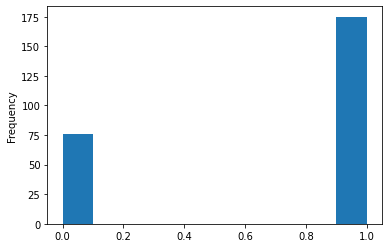

In [1306]:
X['Пол'].plot.hist()

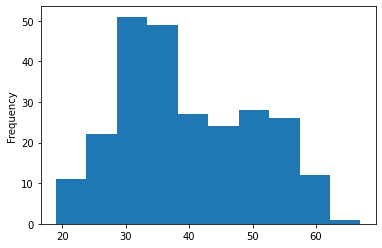

In [1307]:
X['Полных лет'].plot.hist()

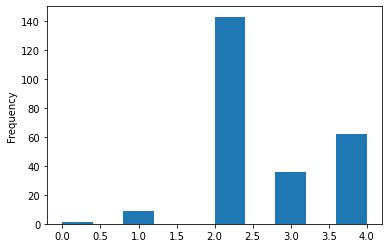

In [1308]:
X['Образование(0-начальное, 4-высшее)'].plot.hist()

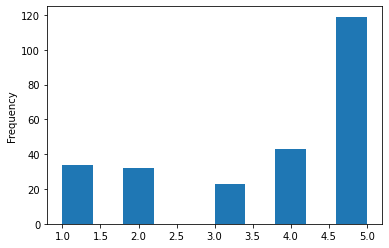

In [1309]:
X['Удовлетворенность семеными отношениями'].plot.hist()

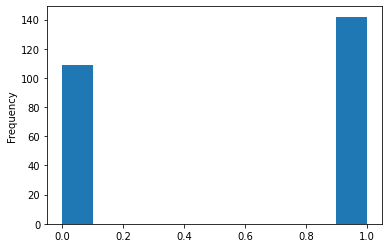

In [1310]:
X['Удовлетворенность материальным положением'].plot.hist()

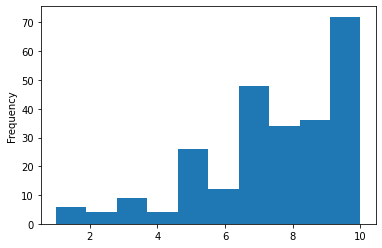

In [1311]:
X['Здоровье от 1 до 10'].plot.hist()

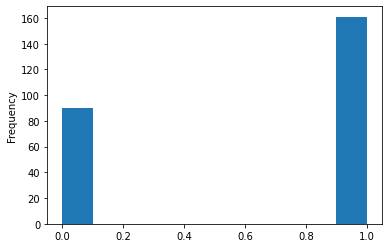

In [1312]:
X['Были ли нарушения сна'].plot.hist()

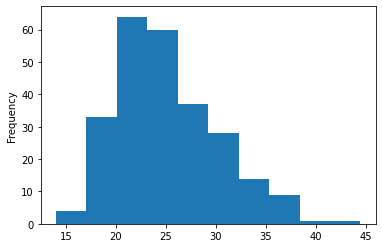

In [1313]:
X['ИМТ'].plot.hist()

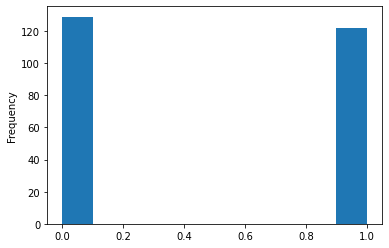

In [1314]:
X['Операции'].plot.hist()

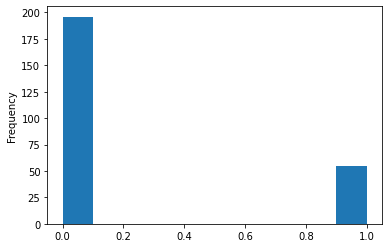

In [1315]:
X['Аллергии'].plot.hist()

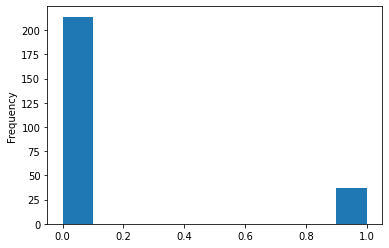

In [1316]:
X['Забол кожи'].plot.hist()

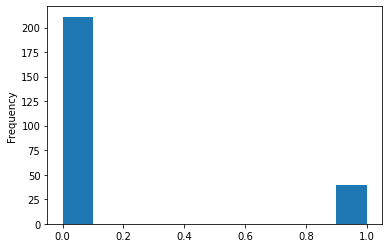

In [1317]:
X['ГБ'].plot.hist()

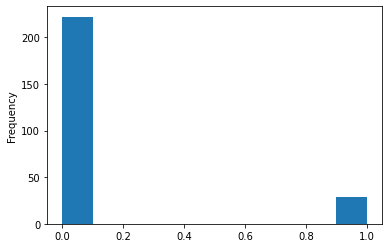

In [1318]:
X['Панкреатит'].plot.hist()

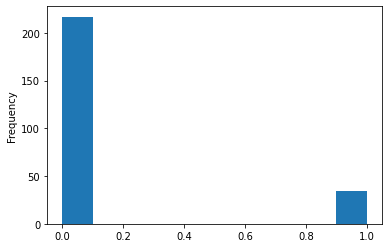

In [1319]:
X['Дисфункция ЖКТ'].plot.hist()

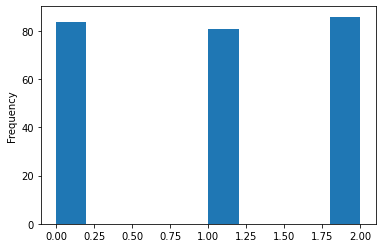

In [1320]:
X['ЧМТ'].plot.hist()

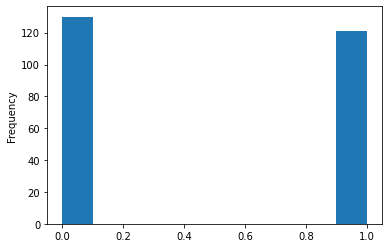

In [1321]:
X['Насл отягощенность'].plot.hist()

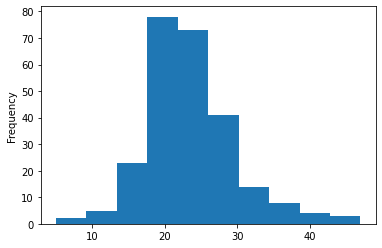

In [1322]:
X['Дебют'].plot.hist()

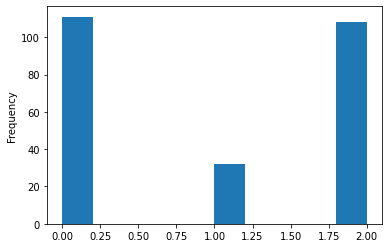

In [1323]:
X['Частота госпит'].plot.hist()

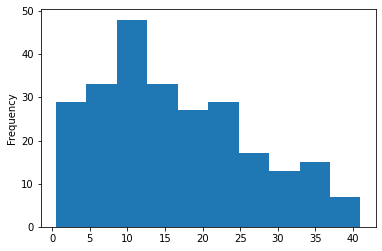

In [1324]:
X['Стаж шизофр'].plot.hist()

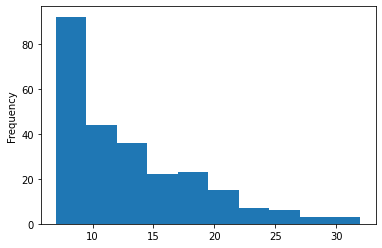

In [1325]:
X['P'].plot.hist()

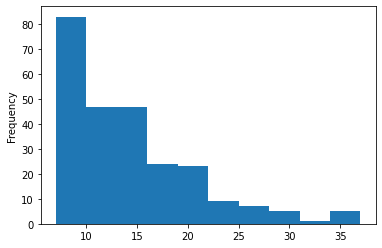

In [1326]:
X['N'].plot.hist()

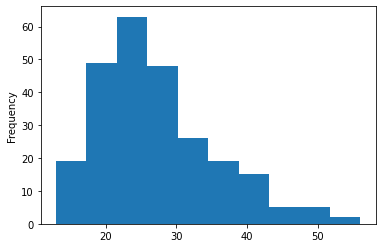

In [1327]:
X['G'].plot.hist()

In [1328]:
X.min()

Пол                                           0.000000
Полных лет                                   19.000000
Образование(0-начальное, 4-высшее)            0.000000
Род занятий(0-0, работает-1                   0.000000
Семейное положение(0-0, 1-женат)              0.000000
Удовлетворенность семеными отношениями        1.000000
Удовлетворенность материальным положением     0.000000
Здоровье от 1 до 10                           1.000000
Были ли нарушения сна                         0.000000
ИМТ                                          14.005112
Операции                                      0.000000
Аллергии                                      0.000000
СД                                            0.000000
Забол кожи                                    0.000000
ГБ                                            0.000000
Панкреатит                                    0.000000
Дисфункция ЖКТ                                0.000000
ЧМТ                                           0.000000
Насл отяго

LASSO regression

In [1329]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [1330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1331]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [1332]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [1333]:
search.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[CV 1/10] END ..model__alpha=94.99999999999994;, score=-0.251 total time=   0.0s
[CV 2/10] END ..model__alpha=94.99999999999994;, score=-0.251 total time=   0.0s
[CV 3/10] END ..model__alpha=94.99999999999994;, score=-0.251 total time=   0.0s
[CV 4/10] END ..model__alpha=94.99999999999994;, score=-0.250 total time=   0.0s
[CV 5/10] END ..model__alpha=94.99999999999994;, score=-0.250 total time=   0.0s
[CV 6/10] END ..model__alpha=94.99999999999994;, score=-0.250 total time=   0.0s
[CV 7/10] END ..model__alpha=94.99999999999994;, score=-0.251 total time=   0.0s
[CV 8/10] END ..model__alpha=94.99999999999994;, score=-0.250 total time=   0.0s
[CV 9/10] END ..model__alpha=94.99999999999994;, score=-0.262 total time=   0.0s
[CV 10/10] END .model__alpha=94.99999999999994;, score=-0.251 total time=   0.0s
[CV 1/10] END ..model__alpha=95.00999999999995;, score=-0.251 total time=   0.0s
[CV 2/10] END ..model__alpha=95.00999999999995;, score=-0.

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([ 0.1 ,  0.11,  0.12, ..., 99.97, 99.98, 99.99])},
             scoring='neg_mean_squared_error', verbose=3)

In [1334]:
search.best_params_


{'model__alpha': 0.1}

In [1335]:
coefficients = search.best_estimator_.named_steps['model'].coef_


In [1336]:
coefficients

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.02137565, -0.        ,
        0.        ,  0.        , -0.        ,  0.0056641 , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.02985768, -0.        ,  0.        ],
      dtype=float32)

In [1337]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02137565, 0.        ,
       0.        , 0.        , 0.        , 0.0056641 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02985768, 0.        , 0.        ],
      dtype=float32)

In [1338]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями',
       'Удовлетворенность материальным положением', 'Здоровье от 1 до 10',
       'Были ли нарушения сна', 'ИМТ', 'Операции', 'Аллергии', 'СД',
       'Забол кожи', 'ГБ', 'Панкреатит', 'Дисфункция ЖКТ', 'ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр', 'P',
       'N', 'G'])[importance > 0]


array(['Были ли нарушения сна', 'Забол кожи', 'P'], dtype='<U41')

In [1339]:
np.array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями',
       'Удовлетворенность материальным положением', 'Здоровье от 1 до 10',
       'Были ли нарушения сна', 'ИМТ', 'Операции', 'Аллергии', 'СД',
       'Забол кожи', 'ГБ', 'Панкреатит', 'Дисфункция ЖКТ', 'ЧМТ',
       'Насл отягощенность', 'Дебют', 'Частота госпит', 'Стаж шизофр', 'P',
       'N', 'G'])[importance == 0]


array(['Пол', 'Полных лет', 'Образование(0-начальное, 4-высшее)',
       'Род занятий(0-0, работает-1', 'Семейное положение(0-0, 1-женат)',
       'Удовлетворенность семеными отношениями',
       'Удовлетворенность материальным положением', 'Здоровье от 1 до 10',
       'ИМТ', 'Операции', 'Аллергии', 'СД', 'ГБ', 'Панкреатит',
       'Дисфункция ЖКТ', 'ЧМТ', 'Насл отягощенность', 'Дебют',
       'Частота госпит', 'Стаж шизофр', 'N', 'G'], dtype='<U41')

In [1242]:
from sklearn.datasets import load_diabetes

load_diabetes()['feature_names']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [1243]:
# Find 3 best predictors witn chi square and ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # chi^2
from sklearn.feature_selection import f_classif # ANOVA

X_chi2 = SelectKBest(chi2, k=5).fit_transform(X, y)
X_anova = SelectKBest(f_classif, k=5).fit_transform(X, y)

Get the Top Selected Features

https://ml2021.medium.com/chi-square-and-anova-feature-selection-for-ml-5e1063ab0991

In [1244]:
f_score = chi2(X, y)
f_score
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([2.27004444e-01, 1.41640085e-01, 8.85776705e-02, 1.72557953e+00,
        3.87955748e-02, 3.17161211e-03, 2.42740890e+00, 3.07154818e+00,
        4.31543488e+00, 2.58715948e-01, 1.49696383e+00, 2.11325714e+00,
        6.82708995e-01, 4.46464007e+00, 3.69631111e+00, 4.08528955e+00,
        4.39262372e-01, 1.27951917e+00, 1.81534829e-02, 3.11785564e-02,
        1.96909626e-01, 7.15919533e-01, 3.58812410e+01, 3.77042313e-03,
        2.70985987e+01]),
 array([6.33753939e-01, 7.06655960e-01, 7.65993200e-01, 1.88976419e-01,
        8.43854205e-01, 9.55089222e-01, 1.19229833e-01, 7.96735620e-02,
        3.77681162e-02, 6.11003691e-01, 2.21139118e-01, 1.46028215e-01,
        4.08655450e-01, 3.46033793e-02, 5.45329075e-02, 4.32580391e-02,
        5.07478692e-01, 2.57988457e-01, 8.92821509e-01, 8.59842620e-01,
        6.57226956e-01, 3.97485647e-01, 2.09718183e-09, 9.51037649e-01,
        1.93338040e-07]))

In [1245]:
pvalues = pd.Series(f_score[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

P                                            2.097182e-09
G                                            1.933380e-07
Забол кожи                                   3.460338e-02
Были ли нарушения сна                        3.776812e-02
Панкреатит                                   4.325804e-02
ГБ                                           5.453291e-02
Здоровье от 1 до 10                          7.967356e-02
Удовлетворенность материальным положением    1.192298e-01
Аллергии                                     1.460282e-01
Род занятий(0-0, работает-1                  1.889764e-01
Операции                                     2.211391e-01
ЧМТ                                          2.579885e-01
Стаж шизофр                                  3.974856e-01
СД                                           4.086554e-01
Дисфункция ЖКТ                               5.074787e-01
ИМТ                                          6.110037e-01
Пол                                          6.337539e-01
Частота госпит

In [1246]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Были ли нарушения сна', 'Забол кожи', 'Панкреатит', 'P', 'G'], dtype='object')

In [1247]:
ds.head(20)

,Пол,Полных лет,"Образование(0-начальное, 4-высшее)","Род занятий(0-0, работает-1","Семейное положение(0-0, 1-женат)",Удовлетворенность семеными отношениями,Удовлетворенность материальным положением,Здоровье от 1 до 10,Были ли нарушения сна,ИМТ,...,Дебют,Частота госпит,Стаж шизофр,P,N,G,(СОН)psqi больше 6,(ТРЕВОГА)Гаиильтон больше 16,(ДЕПРЕССИЯ)madrs больше 6,(ДЕПРЕССИЯ)Калгари больше 5
0,1.0,32.0,4.0,0.0,0.0,5.0,0.0,7.0,1.0,24.012346,...,28.299999,0.0,3.70,11.0,11.0,18.0,0.0,0.0,0.0,0.0
1,1.0,26.0,2.0,0.0,0.0,5.0,0.0,10.0,1.0,20.244898,...,26.000000,1.0,2.00,10.0,25.0,36.0,1.0,0.0,1.0,1.0
2,1.0,49.0,2.0,0.0,0.0,5.0,1.0,10.0,0.0,29.752745,...,26.000000,2.0,23.00,9.0,16.0,23.0,0.0,0.0,0.0,0.0
3,1.0,50.0,2.0,0.0,0.0,5.0,1.0,7.0,1.0,22.093170,...,16.000000,1.0,34.00,13.0,13.0,20.0,0.0,0.0,0.0,0.0
4,1.0,27.0,2.0,1.0,0.0,5.0,1.0,9.0,1.0,26.061680,...,21.000000,0.0,6.00,7.0,9.0,22.0,0.0,0.0,0.0,0.0
5,1.0,39.0,2.0,0.0,0.0,5.0,1.0,7.0,0.0,20.761246,...,34.000000,0.0,4.00,9.0,13.0,22.0,0.0,0.0,0.0,0.0
6,1.0,23.0,3.0,0.0,0.0,4.0,1.0,7.0,0.0,19.623234,...,20.000000,0.0,3.00,7.0,9.0,22.0,1.0,1.0,1.0,0.0
7,1.0,26.0,2.0,1.0,1.0,5.0,1.0,10.0,1.0,25.737082,...,25.000000,2.0,1.00,7.0,9.0,21.0,0.0,0.0,0.0,0.0
8,1.0,37.0,4.0,0.0,0.0,5.0,1.0,7.0,0.0,24.508945,...,20.000000,2.0,17.00,9.0,15.0,22.0,0.0,0.0,0.0,0.0
9,1.0,31.0,2.0,0.0,0.0,1.0,0.0,7.0,0.0,20.603781,...,17.000000,2.0,14.00,7.0,14.0,38.0,1.0,1.0,1.0,1.0


In [1248]:
X_chi2 # TOP 3 - ИМТ, P, G. TOP 5 - Были ли нарушения сна, забол кожи и топ3

array([[ 1.,  0.,  0., 11., 18.],
       [ 1.,  0.,  0., 10., 36.],
       [ 0.,  0.,  0.,  9., 23.],
       ...,
       [ 1.,  0.,  0.,  7., 27.],
       [ 1.,  0.,  0., 14., 21.],
       [ 1.,  0.,  0.,  7., 28.]], dtype=float32)

ANOVA

In [1249]:
univariate = f_classif(X, y)
univariate

(array([7.4597472e-01, 4.9697403e-02, 2.7459836e-01, 2.1454043e+00,
        4.4321254e-02, 5.2437475e-03, 5.6714873e+00, 4.4107866e+00,
        1.2540681e+01, 2.4686132e-01, 2.9234118e+00, 2.7139599e+00,
        6.9579417e-01, 5.3055286e+00, 4.4397712e+00, 4.6680522e+00,
        5.0506049e-01, 1.9037019e+00, 3.4774307e-02, 2.0013262e-02,
        2.2143316e-01, 1.1720605e-01, 1.5671864e+01, 1.2429672e-03,
        1.0870686e+01], dtype=float32),
 array([3.8858485e-01, 8.2377344e-01, 6.0072982e-01, 1.4425880e-01,
        8.3342922e-01, 9.4233078e-01, 1.7995024e-02, 3.6718566e-02,
        4.7517335e-04, 6.1973220e-01, 8.8548832e-02, 1.0073511e-01,
        4.0500003e-01, 2.2082373e-02, 3.6111336e-02, 3.1682927e-02,
        4.7795010e-01, 1.6890225e-01, 8.5222119e-01, 8.8761443e-01,
        6.3836199e-01, 7.3237354e-01, 9.8350603e-05, 9.7190404e-01,
        1.1194290e-03], dtype=float32))

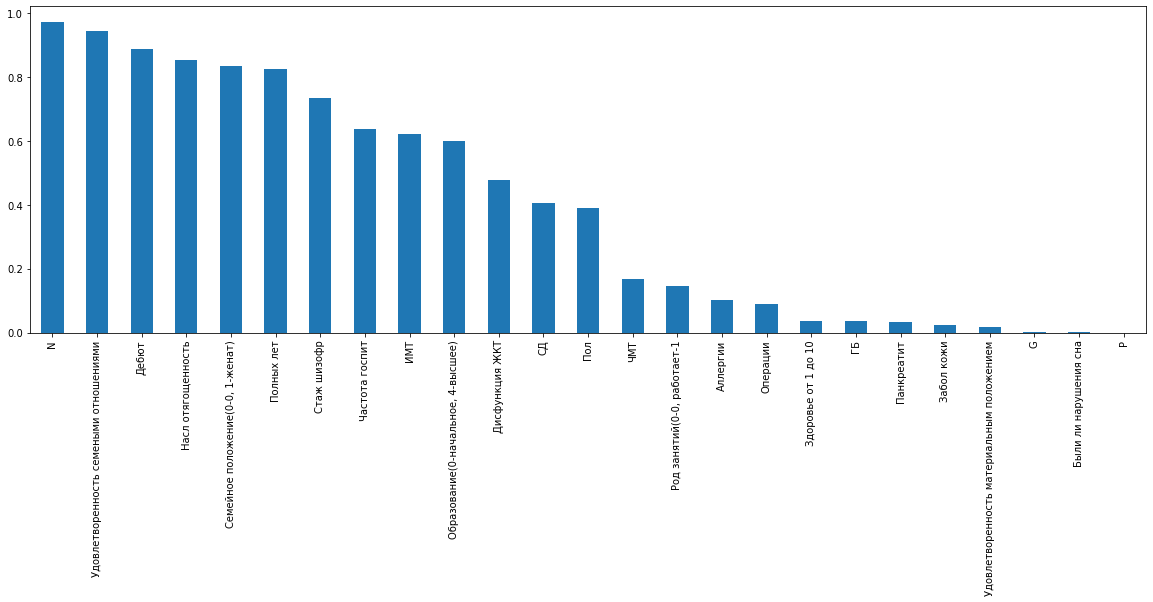

In [1250]:
# The 2nd values are the PValue and we capture those below
univariate = pd.Series(univariate[1])
univariate.index = X.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [1251]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X, y)
X.columns[sel_.get_support()]

Index(['Удовлетворенность материальным положением', 'Были ли нарушения сна',
       'Забол кожи', 'P', 'G'],
      dtype='object')

In [1252]:
X_anova # TOP 3 - Были ли нарушения сна, P, G

array([[ 0.,  1.,  0., 11., 18.],
       [ 0.,  1.,  0., 10., 36.],
       [ 1.,  0.,  0.,  9., 23.],
       ...,
       [ 1.,  1.,  0.,  7., 27.],
       [ 0.,  1.,  0., 14., 21.],
       [ 1.,  1.,  0.,  7., 28.]], dtype=float32)

In [1253]:
# Find 4 best predictors witn scalied data

from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

X_scaled = minmax_scaler.fit_transform(X)
X_chi2_scaled = SelectKBest(chi2, k=4).fit_transform(X_scaled, y)
X_anova_scaled = SelectKBest(f_classif, k=4).fit_transform(X_scaled, y)

In [1254]:
f_score_scaled = chi2(X_scaled, y)
f_score_scaled
# The first array is the F_score , 2nd one is the P_values
# the smaller the P value the more significant the difference in the features

(array([2.27004444e-01, 5.68335249e-03, 2.21444176e-02, 1.72557953e+00,
        3.87955748e-02, 1.08429199e-03, 2.42740890e+00, 3.92886765e-01,
        4.31543488e+00, 1.91719179e-02, 1.49696383e+00, 2.11325714e+00,
        6.82708995e-01, 4.46464007e+00, 3.69631111e+00, 4.08528955e+00,
        4.39262372e-01, 6.39759583e-01, 1.81534829e-02, 9.45120725e-04,
        9.84548131e-02, 1.82393754e-02, 3.21739334e+00, 2.59268909e-04,
        1.21322862e+00]),
 array([0.63375394, 0.939906  , 0.88170356, 0.18897642, 0.8438542 ,
        0.97373153, 0.11922983, 0.53078589, 0.03776812, 0.88987475,
        0.22113912, 0.14602821, 0.40865545, 0.03460338, 0.05453291,
        0.04325804, 0.50747869, 0.42379787, 0.89282151, 0.97547465,
        0.75369186, 0.89256979, 0.07285957, 0.98715315, 0.27069364]))

In [1255]:
pvalues = pd.Series(f_score_scaled[1])
pvalues.index = X.columns
pvalues.sort_values(ascending=True)

Забол кожи                                   0.034603
Были ли нарушения сна                        0.037768
Панкреатит                                   0.043258
ГБ                                           0.054533
P                                            0.072860
Удовлетворенность материальным положением    0.119230
Аллергии                                     0.146028
Род занятий(0-0, работает-1                  0.188976
Операции                                     0.221139
G                                            0.270694
СД                                           0.408655
ЧМТ                                          0.423798
Дисфункция ЖКТ                               0.507479
Здоровье от 1 до 10                          0.530786
Пол                                          0.633754
Частота госпит                               0.753692
Семейное положение(0-0, 1-женат)             0.843854
Образование(0-начальное, 4-высшее)           0.881704
ИМТ                         

In [1256]:
# Now use the SelectKBest Model with the chi2 classifier to find the best features

sel_ = SelectKBest(chi2, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Были ли нарушения сна', 'Забол кожи', 'ГБ', 'Панкреатит', 'P'], dtype='object')

ANOVA

In [1257]:
univariate_scaled = f_classif(X_scaled, y)
univariate_scaled

(array([7.4597472e-01, 4.9464326e-02, 2.7459836e-01, 2.1454043e+00,
        4.4321254e-02, 5.2437475e-03, 5.6714873e+00, 4.4107189e+00,
        1.2540681e+01, 2.4739762e-01, 2.9234118e+00, 2.7139599e+00,
        6.9579417e-01, 5.3055286e+00, 4.4397712e+00, 4.6680522e+00,
        5.0506049e-01, 1.9037019e+00, 3.4774307e-02, 1.9392692e-02,
        2.2143316e-01, 1.1730685e-01, 1.5671837e+01, 1.2395128e-03,
        1.0870758e+01], dtype=float32),
 array([3.8858485e-01, 8.2418036e-01, 6.0072982e-01, 1.4425880e-01,
        8.3342922e-01, 9.4233078e-01, 1.7995024e-02, 3.6719996e-02,
        4.7517335e-04, 6.1935240e-01, 8.8548832e-02, 1.0073511e-01,
        4.0500003e-01, 2.2082373e-02, 3.6111336e-02, 3.1682927e-02,
        4.7795010e-01, 1.6890225e-01, 8.5222119e-01, 8.8935912e-01,
        6.3836199e-01, 7.3226291e-01, 9.8351913e-05, 9.7194314e-01,
        1.1193871e-03], dtype=float32))

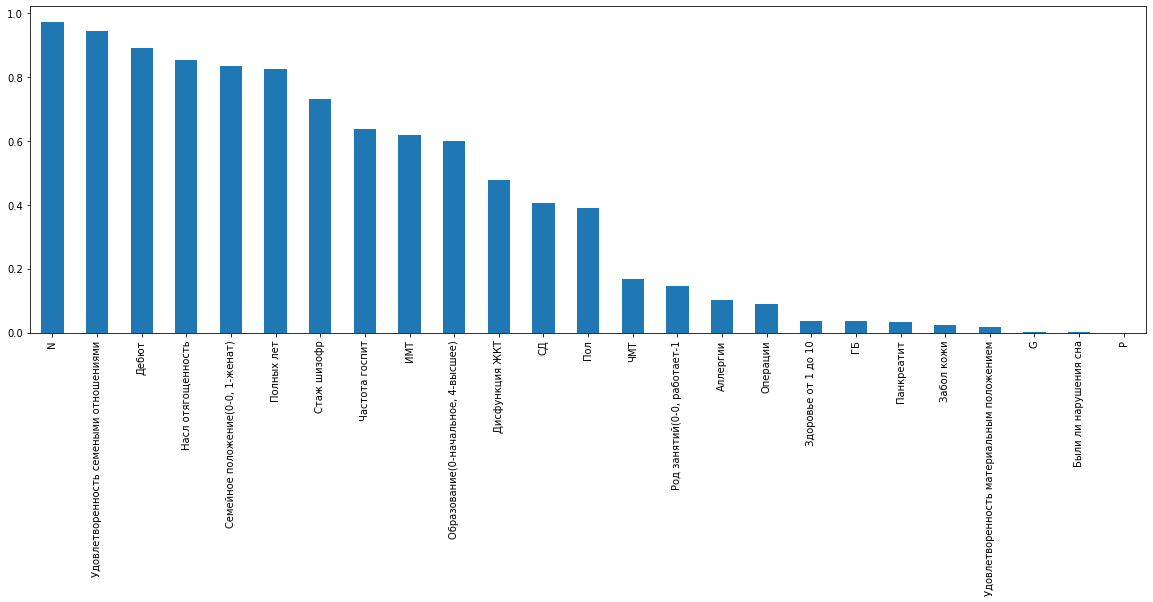

In [1258]:
# The 2nd values are the PValue and we capture those below
univariate_scaled = pd.Series(univariate_scaled[1])
univariate_scaled.index = X.columns
univariate_scaled.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [1259]:
# Get TOP 5 features
sel_ = SelectKBest(f_classif, k=5).fit(X_scaled, y)
X.columns[sel_.get_support()]

Index(['Удовлетворенность материальным положением', 'Были ли нарушения сна',
       'Забол кожи', 'P', 'G'],
      dtype='object')

In [1260]:
# X_chi2_scaled # Были ли нарушения сна, Динамека веса за год, Аллергии, ГБ

In [1261]:
# X_anova_scaled # Были ли нарушения сна, Аллергии, P, G

In [1262]:
# How many times and which features were the most influential?

# Аллергии 4
# Были ли нарушения сна  3
# P 3
# G 3
# Динамека веса за год 1 
# ГБ 1
# Стаж шизофр 1

In [1263]:
# Using best features
# X = X[['Аллергии', 'Были ли нарушения сна', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ']]

# X = X[['Удовлетворенность материальным положением', 'Были ли нарушения сна', 'Забол кожи', 'P', 'G']]

# X = X[['Забол кожи', 'Были ли нарушения сна', 'Панкреатит', 'ГБ', 'P']]

# X = X[['P', 'G', 'ИМТ', 'Были ли нарушения сна', 'N']]

X = X[['Были ли нарушения сна', 'Забол кожи', 'P']]

In [1264]:
# Train/test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)

In [1265]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 0.6822 - accuracy: 0.6000 - val_loss: 0.6995 - val_accuracy: 0.6275
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6709 - accuracy: 0.5600 - val_loss: 0.7015 - val_accuracy: 0.5882
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6551 - accuracy: 0.6300 - val_loss: 0.7243 - val_accuracy: 0.4314
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6459 - accuracy: 0.6250 - val_loss: 0.7181 - val_accuracy: 0.5294
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6324 - accuracy: 0.6550 - val_loss: 0.7217 - val_accuracy: 0.6471
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.6300 - val_loss: 0.7327 - val_accuracy: 0.5294
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6264 - accuracy: 0.6650 - val_loss: 0.7488 - val_accuracy: 0.5294
Epoch 8/50
7/7 [=================

In [1266]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.6906 - accuracy: 0.5600 - val_loss: 0.6949 - val_accuracy: 0.5294
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6805 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5490
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6200 - val_loss: 0.7284 - val_accuracy: 0.4314
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6384 - accuracy: 0.6250 - val_loss: 0.7208 - val_accuracy: 0.6078
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6209 - accuracy: 0.6550 - val_loss: 0.7504 - val_accuracy: 0.5686
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.6350 - val_loss: 0.8104 - val_accuracy: 0.5882
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6159 - accuracy: 0.6450 - val_loss: 0.8671 - val_accuracy: 0.5294
Epoch 8/50
7/7 [=================

In [1267]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 31ms/step - loss: 0.6923 - accuracy: 0.5900 - val_loss: 0.7333 - val_accuracy: 0.3922
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6625 - accuracy: 0.6000 - val_loss: 0.7049 - val_accuracy: 0.5882
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6378 - accuracy: 0.6200 - val_loss: 0.7497 - val_accuracy: 0.5294
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.6750 - val_loss: 0.7594 - val_accuracy: 0.5490
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6016 - accuracy: 0.6650 - val_loss: 0.8095 - val_accuracy: 0.5490
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6023 - accuracy: 0.6400 - val_loss: 0.8716 - val_accuracy: 0.6275
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6300 - val_loss: 0.8505 - val_accuracy: 0.4314
Epoch 8/50
7/7 [=================

In [1268]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 0.6860 - accuracy: 0.6150 - val_loss: 0.6955 - val_accuracy: 0.5098
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6786 - accuracy: 0.6200 - val_loss: 0.6947 - val_accuracy: 0.5686
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6734 - accuracy: 0.6400 - val_loss: 0.7009 - val_accuracy: 0.5490
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.6450 - val_loss: 0.7025 - val_accuracy: 0.5490
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6450 - val_loss: 0.7056 - val_accuracy: 0.5882
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.6400 - val_loss: 0.7146 - val_accuracy: 0.5686
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6551 - accuracy: 0.6650 - val_loss: 0.7222 - val_accuracy: 0.5686
Epoch 8/50
7/7 [=================

In [1269]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 29ms/step - loss: 0.6928 - accuracy: 0.5350 - val_loss: 0.6950 - val_accuracy: 0.3922
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.5200 - val_loss: 0.6874 - val_accuracy: 0.6275
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6793 - accuracy: 0.6050 - val_loss: 0.6971 - val_accuracy: 0.5098
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6684 - accuracy: 0.6200 - val_loss: 0.7017 - val_accuracy: 0.4706
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6561 - accuracy: 0.6500 - val_loss: 0.7027 - val_accuracy: 0.5490
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6406 - accuracy: 0.6500 - val_loss: 0.7225 - val_accuracy: 0.5294
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6313 - accuracy: 0.6500 - val_loss: 0.7371 - val_accuracy: 0.5294
Epoch 8/50
7/7 [=================

In [1270]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.7003 - val_accuracy: 0.3922
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6814 - accuracy: 0.5650 - val_loss: 0.6939 - val_accuracy: 0.5686
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.6000 - val_loss: 0.7075 - val_accuracy: 0.4314
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.6200 - val_loss: 0.7043 - val_accuracy: 0.5294
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6451 - accuracy: 0.6550 - val_loss: 0.7088 - val_accuracy: 0.5686
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6200 - val_loss: 0.7415 - val_accuracy: 0.5490
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6205 - accuracy: 0.6650 - val_loss: 0.7600 - val_accuracy: 0.5490
Epoch 8/50
7/7 [=================

In [1271]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 28ms/step - loss: 0.6874 - accuracy: 0.5400 - val_loss: 0.6923 - val_accuracy: 0.5686
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5800 - val_loss: 0.6924 - val_accuracy: 0.5686
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6863 - accuracy: 0.5700 - val_loss: 0.6926 - val_accuracy: 0.5098
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6857 - accuracy: 0.5800 - val_loss: 0.6929 - val_accuracy: 0.5098
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.6050 - val_loss: 0.6929 - val_accuracy: 0.5098
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.6050 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5950 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 8/50
7/7 [=================

In [1272]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 27ms/step - loss: 0.6949 - accuracy: 0.5250 - val_loss: 0.6946 - val_accuracy: 0.3922
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5250 - val_loss: 0.6938 - val_accuracy: 0.3922
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6937 - val_accuracy: 0.4118
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5400 - val_loss: 0.6936 - val_accuracy: 0.3922
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5850 - val_loss: 0.6933 - val_accuracy: 0.3922
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.5900 - val_loss: 0.6932 - val_accuracy: 0.4118
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.6150 - val_loss: 0.6926 - val_accuracy: 0.4314
Epoch 8/50
7/7 [=================

In [1273]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
7/7 [==============================] - 1s 26ms/step - loss: 0.6960 - accuracy: 0.5050 - val_loss: 0.6936 - val_accuracy: 0.4902
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5500 - val_loss: 0.6923 - val_accuracy: 0.5490
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5950 - val_loss: 0.6927 - val_accuracy: 0.6078
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.6050 - val_loss: 0.6930 - val_accuracy: 0.6275
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6100 - val_loss: 0.6927 - val_accuracy: 0.6078
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5950 - val_loss: 0.6926 - val_accuracy: 0.6078
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.6000 - val_loss: 0.6921 - val_accuracy: 0.6078
Epoch 8/50
7/7 [=================

In [1274]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
7/7 [==============================] - 2s 28ms/step - loss: 0.6874 - accuracy: 0.5400 - val_loss: 0.6923 - val_accuracy: 0.5686
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5800 - val_loss: 0.6924 - val_accuracy: 0.5686
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6863 - accuracy: 0.5700 - val_loss: 0.6926 - val_accuracy: 0.5098
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5800 - val_loss: 0.6929 - val_accuracy: 0.5098
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.6050 - val_loss: 0.6929 - val_accuracy: 0.5098
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6050 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.5950 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 8/100
7/7 [=========

In [1275]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6869 - accuracy: 0.5400 - val_loss: 0.6931 - val_accuracy: 0.5098
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6100 - val_loss: 0.6931 - val_accuracy: 0.4902
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.6050 - val_loss: 0.6944 - val_accuracy: 0.4902
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.6250 - val_loss: 0.6955 - val_accuracy: 0.4706
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.6200 - val_loss: 0.6968 - val_accuracy: 0.4706
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6100 - val_loss: 0.6991 - val_accuracy: 0.4902
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6100 - val_loss: 0.7012 - val_accuracy: 0.5098
Epoch 8/100
4

In [1276]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6884 - accuracy: 0.5300 - val_loss: 0.6903 - val_accuracy: 0.6078
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5900 - val_loss: 0.6884 - val_accuracy: 0.6078
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5900 - val_loss: 0.6907 - val_accuracy: 0.6078
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.6000 - val_loss: 0.6919 - val_accuracy: 0.6078
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.6200 - val_loss: 0.6938 - val_accuracy: 0.6275
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.6500 - val_loss: 0.6964 - val_accuracy: 0.5490
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6450 - val_loss: 0.6987 - val_accuracy: 0.5490
Epoch 8/100
4

In [1277]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.6955 - accuracy: 0.4550 - val_loss: 0.6930 - val_accuracy: 0.4118
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5850 - val_loss: 0.6906 - val_accuracy: 0.6078
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.6000 - val_loss: 0.6910 - val_accuracy: 0.6078
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.6000 - val_loss: 0.6887 - val_accuracy: 0.6078
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.6100 - val_loss: 0.6845 - val_accuracy: 0.6078
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.6050 - val_loss: 0.6846 - val_accuracy: 0.6275
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6000 - val_loss: 0.6853 - val_accuracy: 0.6275
Epoch 8/100
4

In [1278]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),
    tf.keras.layers.Dense(14, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
40/40 [==============================] - 1s 7ms/step - loss: 0.6895 - accuracy: 0.5650 - val_loss: 0.7019 - val_accuracy: 0.3922
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5950 - val_loss: 0.6971 - val_accuracy: 0.3922
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.6150 - val_loss: 0.7030 - val_accuracy: 0.4118
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6200 - val_loss: 0.7025 - val_accuracy: 0.4902
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6000 - val_loss: 0.7027 - val_accuracy: 0.5294
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6308 - accuracy: 0.6550 - val_loss: 0.7211 - val_accuracy: 0.5490
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6550 - val_loss: 0.7423 - val_accuracy: 0.5490
Epoch 8/100
4

In [1279]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)


history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    batch_size=5,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 0.6921 - accuracy: 0.5600 - val_loss: 0.6957 - val_accuracy: 0.3922
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.5650 - val_loss: 0.6855 - val_accuracy: 0.6078
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6699 - accuracy: 0.5700 - val_loss: 0.7291 - val_accuracy: 0.4706
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6700 - val_loss: 0.7471 - val_accuracy: 0.4706
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.6200 - val_loss: 0.7657 - val_accuracy: 0.5882
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6750 - val_loss: 0.7569 - val_accuracy: 0.5686
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.6450 - val_loss: 0.7981 - val_accuracy: 0.5686
Epoch 8/100
4

In [1280]:
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна больше 5'])
# X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

KeyError: ignored

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history0 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:
plot_loss_curves(history0)

### Find bels LR

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history_lr = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # lrs - x-axis, history - y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

In [ ]:
plot_loss_curves(history1)

In [ ]:
train_data = data[:121] # 70%
validation_data = data[121:155] # 20%
test_data = data[155:174] # 10%

In [ ]:
y_train = train_data['Нарушения сна больше 5']
y_validation = validation_data['Нарушения сна больше 5']
y_test = test_data['Нарушения сна больше 5']

X_train = train_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_validation = validation_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_test = test_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]

In [ ]:
len(y_train), len(y_validation), len(y_test)

In [ ]:
# y = data['Нарушения сна']
# # X = data.drop(columns=['Нарушения сна'])
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_validation_scaled, y_validation))

In [ ]:
plot_loss_curves(history)

### It is very likely that the model has overfitted. It is necessary to add data augmentation, validation data, visualization
Find best lr

Вывести наиболее значимые характеристики



Check result on different scalers. For example:

1) Min Max Scaler (try it)

2) Standard Scaler

3) Max Abs Scaler

4) Robust Scaler

5) Quantile Transformer Scaler

6) Power Transformer Scaler

7) Unit Vector Scaler



In [ ]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога больше 7', 'Madrs больше 6', 'Калгари больше 5'])
y = data['Нарушения сна больше 5']
# X = data.drop(columns=['Нарушения сна'])
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']] # 'Были ли нарушения сна', 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Scale X from 0 to 1
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_scaled, y_train, epochs=50)